In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import titanic dataset
data = pd.read_csv('titanic_train.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


###### Dataframe info

In [3]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (891, 12) 

Data columns: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=891, step=1) 

Data values: 
 [[1 0 3 ... 7.25 nan 'S']
 [2 1 1 ... 71.2833 'C85' 'C']
 [3 1 3 ... 7.925 nan 'S']
 ...
 [889 0 3 ... 23.45 nan 'S']
 [890 1 1 ... 30.0 'C148' 'C']
 [891 0 3 ... 7.75 nan 'Q']] 

Data info: 
 <bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Na

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


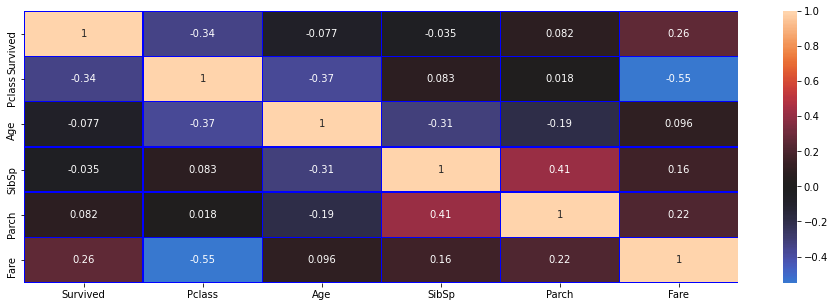

In [8]:
# Correlation matrix
list_col_origin = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix_origin = (data.loc[:, list_col_origin]).corr(method ='pearson')
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see from previous heatmap correlation matrix Fare and Pclass have higher correlation with target variable Survived then other features. 

#### Data visualisation

In [59]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.distplot(data[data.columns[j]], ax=axes[j] )
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()


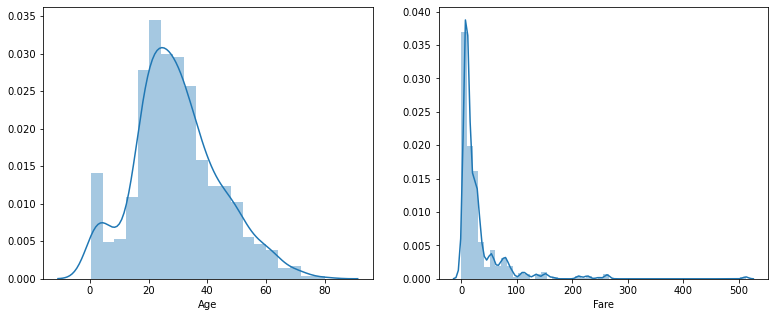

In [31]:
# Let see the distribution of each continual feature in dataset
sub_hist(data.iloc[:, [5,9]],m=13,n=5, num_col = 2)

In [18]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.boxplot(data[data.columns[j]], ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()

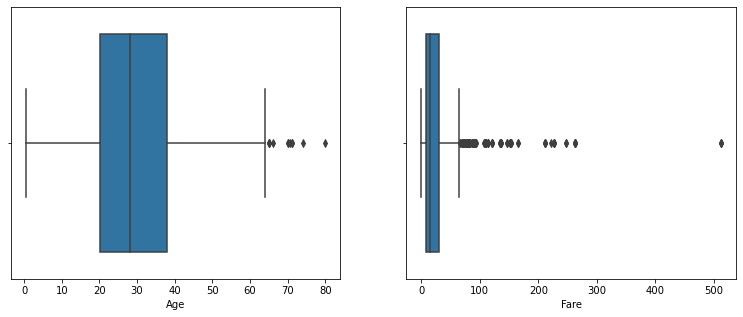

In [19]:
# Let see the distribution of each continual feature in dataset using boxplots
sns.boxplot(data[data.columns[j]], ax=axes[j])
sub_boxplot(data.iloc[:, [5,9]],m=13,n=5, num_col = 2)

<Figure size 720x504 with 0 Axes>

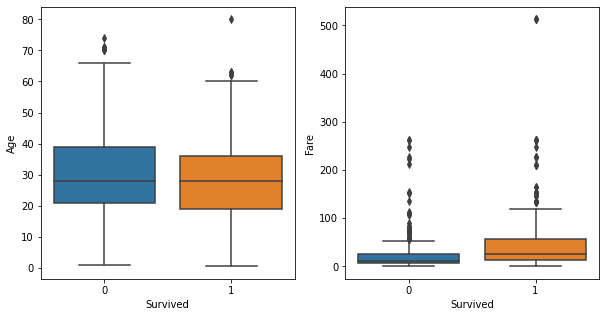

In [25]:
# Fare and Age by Survived
plt.figure(figsize=(10, 7))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y = 'Age', x = 'Survived', data = data, ax=axes[0])
sns.boxplot(y = 'Fare', x = 'Survived', data = data, ax=axes[1])

In [63]:
# Let create function for ploting distribution of descrete variables
def sub_countplot(data, m=15, n=25, y = None, hue = None, num_col = None, *args):
    num = 0
    if y:
        num +=1
    elif hue:
        num +=1
    if (data.shape[1]-num) %2 == 0:
        i = (data.shape[1]-num)//num_col
    else:
        i = (data.shape[1]-num)//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    data_col = list(data.columns)
    data_col = [x for x in data_col if x not in {y, hue}]
    if i == 1:
        for j in range(num_col):
            sns.countplot(x = data_col[j], y=y, data=data, hue=hue, ax=axes[j])
    else: 
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < (data.shape[1]-num):
                    sns.countplot(x = data_col[2*i+j], y=y, data=data, hue=hue, ax=axes[i,j])
                else:
                    axes[i,j].set_axis_off()

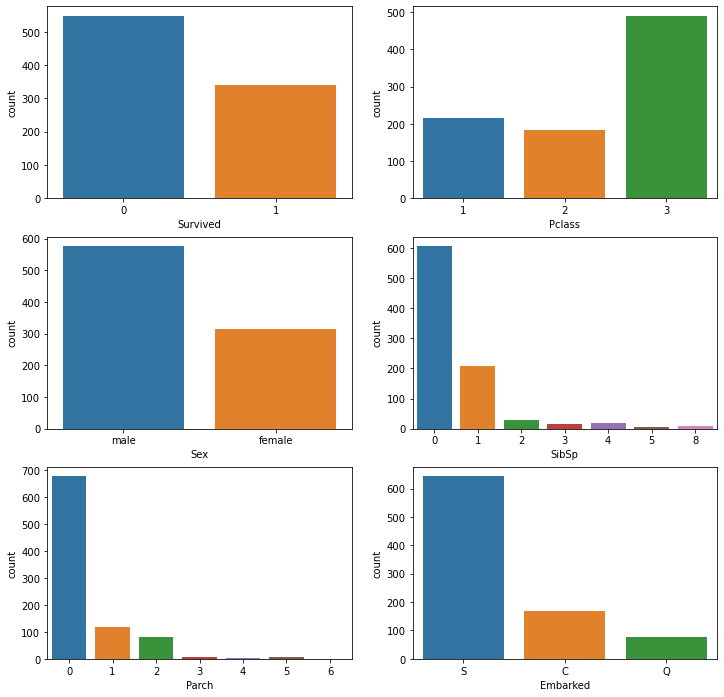

In [64]:
# Let see the distribution of each descrete feature and target variable
sub_countplot(data = data.iloc[:,[1,2,4,6,7,11]], m=12, n=12, num_col = 2)

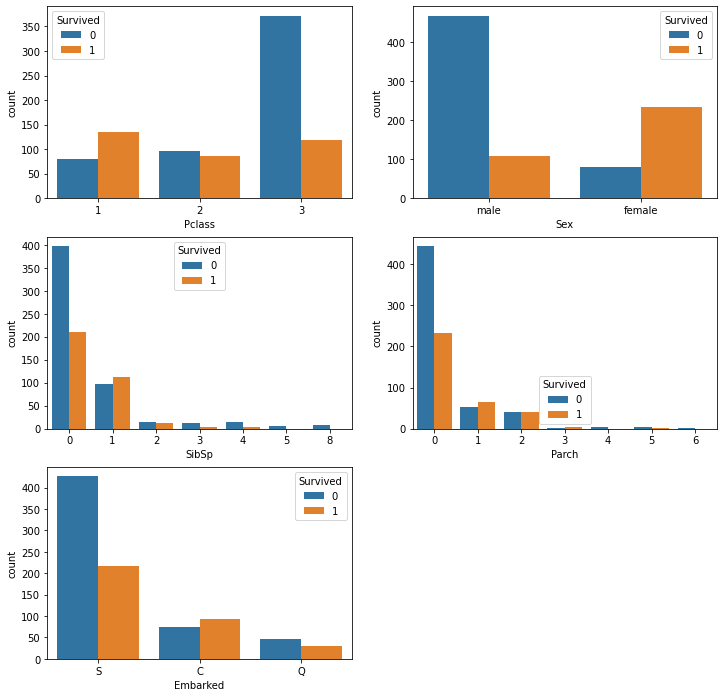

In [65]:
# Let see dist of descrete features by target
sub_countplot(data = data.iloc[:,[1,2,4,6,7,11]], hue='Survived', m=12, n=12, num_col = 2)

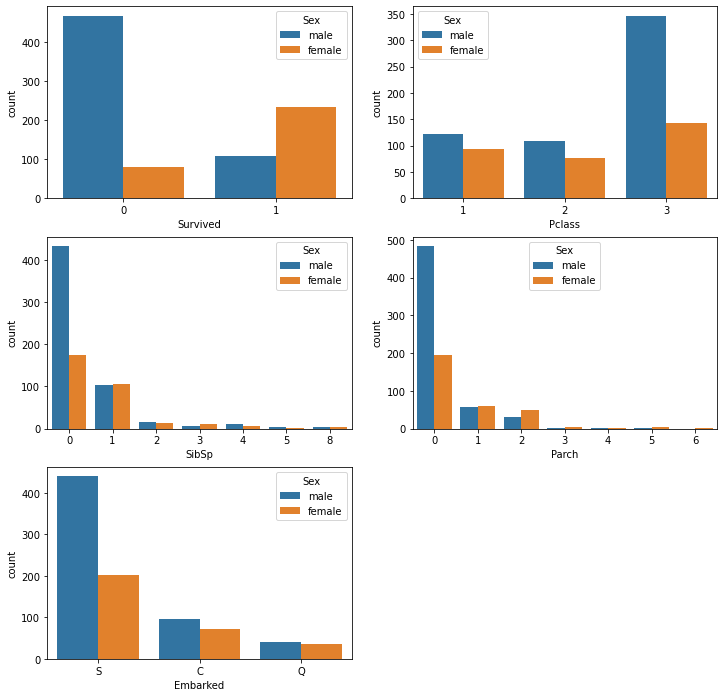

In [66]:
# Let see dist of descrete features by Sex
sub_countplot(data = data.iloc[:,[1,2,4,6,7,11]], hue='Sex', m=12, n=12, num_col = 2)

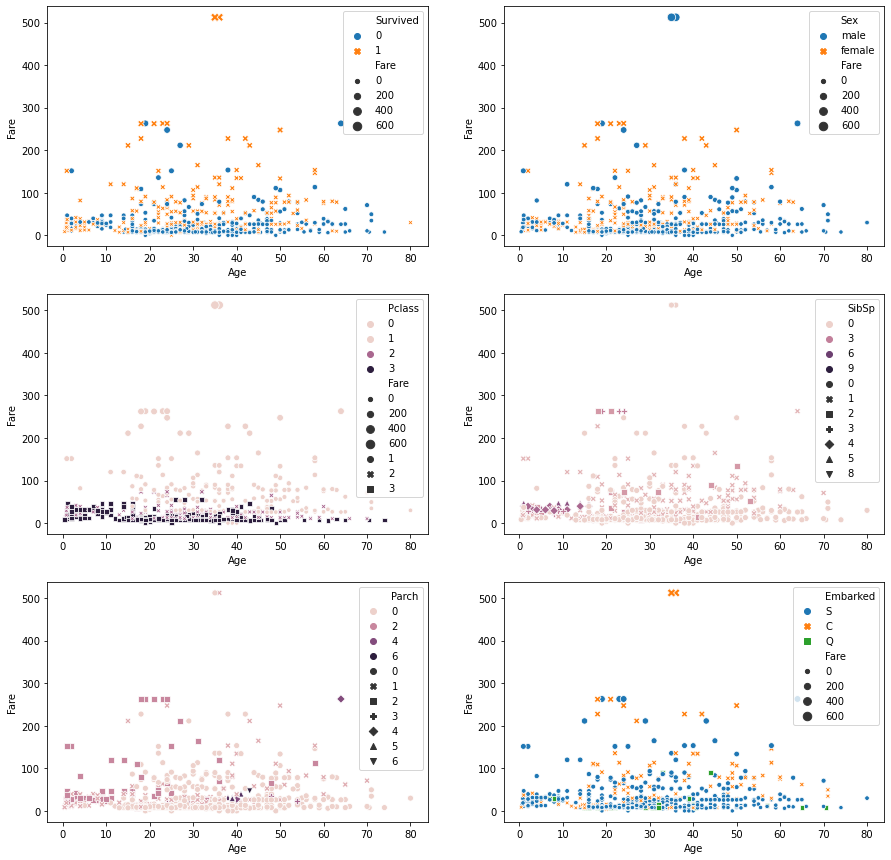

In [74]:
# Age vs Fare by Survived, Sex, Pclass, SibSp, Parch, Embarked
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='Survived', style='Survived', size='Fare', ax=axes[0,0])
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='Sex', style='Sex', size='Fare', ax=axes[0,1])
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='Pclass', style='Pclass', size='Fare', ax=axes[1,0])
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='SibSp', style='SibSp', ax=axes[1,1])
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='Parch', style='Parch', ax=axes[2,0])
sns.scatterplot(x = 'Age', y='Fare', data=data, hue='Embarked', style='Embarked', size='Fare', ax=axes[2,1])

#### Dealing with missing data

In [180]:
# Missing values in whole dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [181]:
# Number of unique values of cabin
print(f"Number of unique values of cabin: {len(data['Cabin'].unique())} and number of missing values of cabin is {data.isnull().sum()[10]}.")

Number of unique values of cabin: 148 and number of missing values of cabin is 687.


In [182]:
# We will fill NaN values of feature Embarked with mode of this feature, median for Age and 'unknown' for Cabin
data_2 = data.copy()
values = {'Embarked': data['Embarked'].mode()[0], 'Cabin': 'unknown', 'Age': data['Age'].median()}
data_2.fillna(value = values, inplace=True)
data_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Handling categorical / nominal data

In [183]:
# Transform Sex feature using LabelEncoder because we have just 2 different values
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
data_2['Sex'] = class_le.fit_transform(data_2.loc[: , 'Sex'])
display(data_2.head(4))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S


In [184]:
# Transform Embarked feature using OneHotEncoder because this is nominal feature
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(data_2.loc[:, ['Cabin', 'Ticket', 'Embarked']])
df_enc = pd.DataFrame(ohe.transform(data_2.loc[:, ['Cabin', 'Ticket', 'Embarked']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_A10,x0_A14,x0_A16,x0_A19,x0_A20,x0_A23,x0_A24,x0_A26,x0_A31,x0_A32,...,x1_W./C. 14263,x1_W./C. 6607,x1_W./C. 6608,x1_W./C. 6609,x1_W.E.P. 5734,x1_W/C 14208,x1_WE/P 5735,x2_C,x2_Q,x2_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
# Now we will merge this two dataframes data_2 and df_enc by index
data_merge = pd.concat([data_2,df_enc], axis=1)
data_merge.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,x1_W./C. 14263,x1_W./C. 6607,x1_W./C. 6608,x1_W./C. 6609,x1_W.E.P. 5734,x1_W/C 14208,x1_WE/P 5735,x2_C,x2_Q,x2_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Split dataset on train and test

In [186]:
# We will drop redundant feature PassengerId also we will drop Cabin because more then 2/3 values are missing
X = data_merge.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis = 1)
y = data['Survived']
display(X.head(2))
print(y)

,Pclass,Sex,Age,SibSp,Parch,Fare,x0_A10,x0_A14,x0_A16,x0_A19,...,x1_W./C. 14263,x1_W./C. 6607,x1_W./C. 6608,x1_W./C. 6609,x1_W.E.P. 5734,x1_W/C 14208,x1_WE/P 5735,x2_C,x2_Q,x2_S
0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [187]:
print(f'Data shape: {data_merge.shape} \n')
print(f"X shape: {X.shape}")

Data shape: (891, 844) 

X shape: (891, 838)


In [188]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [189]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (623, 838)
y_train shape: (623,)
X_test shape: (268, 838)
y_test shape: (268,)


#### Balance dataset

Since our dataset is imbalanced then we need to use one of tehnique to balance our dataset. We will oversample the minor target class using imblearn.over_sampling.SMOTE

In [190]:
# import sklearn
# from imblearn.over_sampling import SMOTE

# # Let oversample minor target class
# smote = SMOTE(random_state=42)
# X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
# print(f" Oversampled train set shape: {X_train_sm.shape}\n")

In [191]:
# Let see the distribution
# sub_boxplot(data = X_train_sm.drop(['Pregnancies'], axis = 1),m=13,n=13, num_col = 2)

In [192]:
# Distribution of target variable
# sns.countplot(y_train_sm)

#### Bringing features onto the same scale¶

In [194]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [195]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [196]:
# Distribution of normalized data train data
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,x0_A10,x0_A14,x0_A16,x0_A19,...,x1_W./C. 14263,x1_W./C. 6607,x1_W./C. 6608,x1_W./C. 6609,x1_W.E.P. 5734,x1_W/C 14208,x1_WE/P 5735,x2_C,x2_Q,x2_S
0,0.0,1.0,0.634438,0.000,0.000000,0.051822,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.609227,0.125,0.000000,0.149765,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.004160,0.625,0.333333,0.091543,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


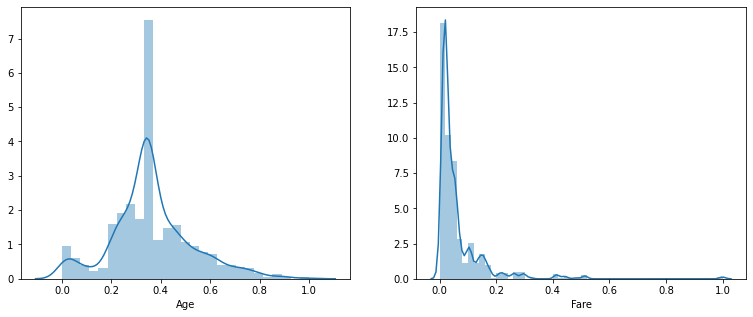

In [199]:
# Dist of normalized data
sub_hist(df_norm.iloc[:, [2,5]],m=13,n=5, num_col = 2)

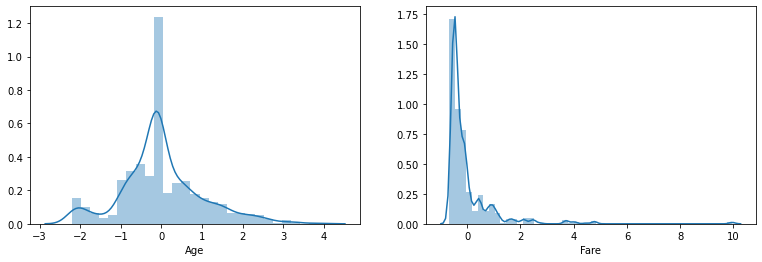

In [200]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std.iloc[:, [2,5]],m=13,n=4, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [201]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
acc_scores_std = {}

In [202]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores

In [203]:
# First model SVC kernel linear
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
svc_linear = SVC(kernel='linear', C=1)
model_1 = train_model(svc_linear, X_train_std, y_train, X_test_std, y_test, 'svc_linear', acc_scores_std)

Cross_val_scores: [0.768      0.856      0.784      0.74193548 0.83064516] 
 
Cross_val_scores_mean: 0.7961161290322581 
 
Cross_val_scores_std: 0.04159613365527663 

Acc_score of svc_linear: 0.8134328358208955


In [204]:
# Second model SVC_rbf
SVC_rbf = SVC()
model_2 = train_model(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf', acc_scores_std)

Cross_val_scores: [0.656      0.688      0.704      0.64516129 0.66935484] 
 
Cross_val_scores_mean: 0.6725032258064516 
 
Cross_val_scores_std: 0.0212699178857805 

Acc_score of SVC_rbf: 0.7276119402985075


In [205]:
# Third model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_3 = train_model(rf, X_train_std, y_train, X_test_std, y_test, 'ran_forest_def', acc_scores_std)

Cross_val_scores: [0.824      0.856      0.776      0.79032258 0.83064516] 
 
Cross_val_scores_mean: 0.8153935483870969 
 
Cross_val_scores_std: 0.0287609864091962 

Acc_score of ran_forest_def: 0.832089552238806


In [206]:
# Fourth model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model_4 = train_model(log_reg, X_train_std, y_train, X_test_std, y_test, 'log_reg_def', acc_scores_std)

Cross_val_scores: [0.784      0.784      0.784      0.75806452 0.83064516] 
 
Cross_val_scores_mean: 0.788141935483871 
 
Cross_val_scores_std: 0.023505923711518727 

Acc_score of log_reg_def: 0.7985074626865671


Text(0, 0.5, 'Testing Accuracy')

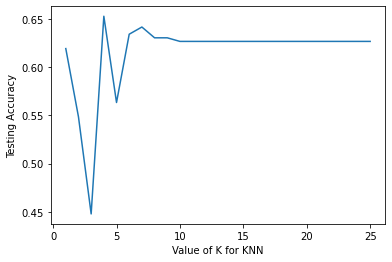

In [207]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [208]:
models_KNN = {}
for k in {4,8}:
    KNN = KNeighborsClassifier(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_std, y_train, X_test_std, y_test,acc_scores = acc_scores_std, model_name ='KNN_'+str(k))

Results of KNN with 8 neighbors: 
 
Cross_val_scores: [0.608      0.608      0.616      0.61290323 0.62096774] 
 
Cross_val_scores_mean: 0.6131741935483871 
 
Cross_val_scores_std: 0.0049465656739501014 

Acc_score of KNN_8: 0.6305970149253731
Results of KNN with 4 neighbors: 
 
Cross_val_scores: [0.6        0.608      0.616      0.49193548 0.29032258] 
 
Cross_val_scores_mean: 0.5212516129032259 
 
Cross_val_scores_std: 0.12400927493760902 

Acc_score of KNN_4: 0.6529850746268657


In [209]:
# 7th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_class.fit(X_train_std,y_train)
# Test model
y_pred = xg_class.predict(X_test_std)
acc_scores_std['xgb_reg_logistic'] = accuracy_score(y_test, y_pred)

print(acc_scores_std['xgb_reg_logistic'])

0.7947761194029851


In [210]:
# 8th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model_10 = train_model(sgdclass, X_train_std, y_train, X_test_std, y_test, acc_scores=acc_scores_std, model_name = 'sgdclass')

Cross_val_scores: [0.632      0.68       0.72       0.67741935 0.76612903] 
 
Cross_val_scores_mean: 0.6951096774193548 
 
Cross_val_scores_std: 0.04513836099943018 

Acc_score of sgdclass: 0.7649253731343284


In [211]:
# 9th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model_11 = train_model(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, acc_scores=acc_scores_std, model_name = 'Dec_tree_class')

Cross_val_scores: [0.8        0.824      0.808      0.83064516 0.81451613] 
 
Cross_val_scores_mean: 0.8154322580645162 
 
Cross_val_scores_std: 0.010945966999237057 

Acc_score of Dec_tree_class: 0.835820895522388


In [212]:
# 10th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model_12 = train_model(bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, acc_scores=acc_scores_std, model_name = 'bag_class_extra_tree')

Cross_val_scores: [0.832      0.824      0.8        0.78225806 0.80645161] 
 
Cross_val_scores_mean: 0.8089419354838709 
 
Cross_val_scores_std: 0.017644310883558778 

Acc_score of bag_class_extra_tree: 0.8097014925373134


In [214]:
# Lets plot the results of models
df_results = pd.DataFrame({'models': list(acc_scores_std.keys()),
                          'models_acc': list(acc_scores_std.values())})
df_results

,models,models_acc
0,svc_linear,0.813433
1,SVC_rbf,0.727612
2,ran_forest_def,0.832090
3,log_reg_def,0.798507
4,KNN_8,0.630597
5,KNN_4,0.652985
6,xgb_reg_logistic,0.794776
7,sgdclass,0.764925
8,Dec_tree_class,0.835821
9,bag_class_extra_tree,0.809701


[Text(0, 0.5, 'models_acc')]

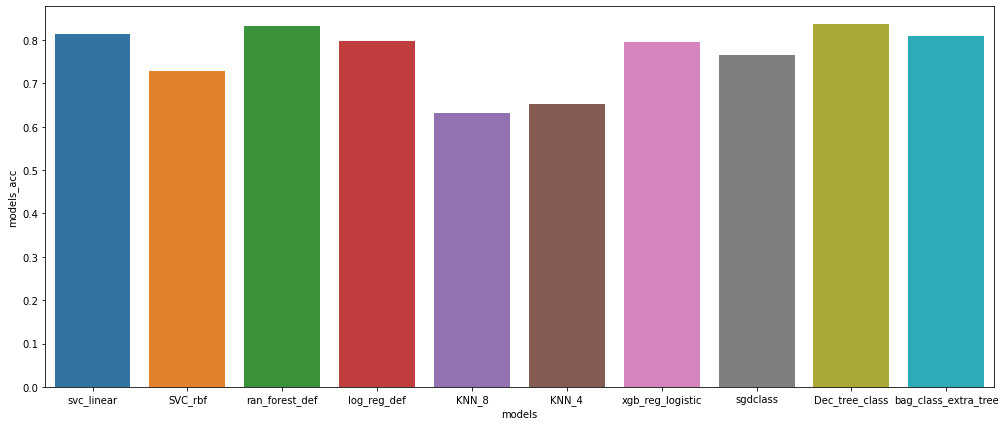

In [215]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_acc", data = df_results)
ax.set(ylabel = "models_acc")

In [216]:
# Let see which model gives the best result
print(f"The model with best acc is {max(acc_scores_std, key=acc_scores_std.get)} and it's acc is {acc_scores_std[max(acc_scores_std, key=acc_scores_std.get)]:.3f}.")

The model with best acc is Dec_tree_class and it's acc is 0.836.
